## Realtime multimodal Usecase | Extract Image,Table,Text from Document | MultiModal Summrizer| RAG App

### We use `Unstructured` library to parse data

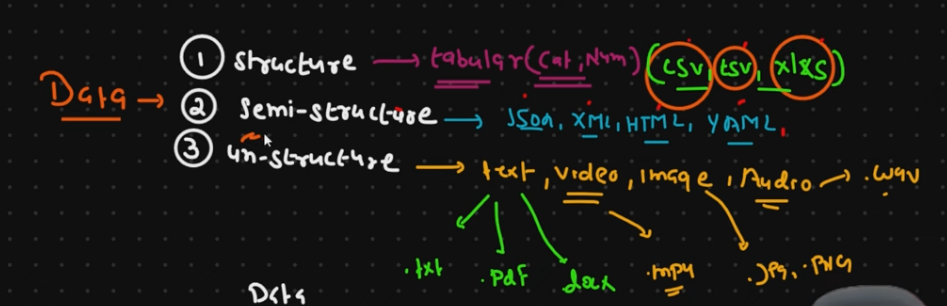

### Libraries

In [ ]:
!pip install "unstructured[all-docs]" pillow pydantic lxml matplotlib

In [ ]:
!sudo apt-get install poppler-utils

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
poppler-utils is already the newest version (22.02.0-2ubuntu0.6).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.


In [ ]:
!sudo apt-get install libleptonica-dev tesseract-ocr libtesseract-dev python3-pil tesseract-ocr-eng tesseract-ocr-script-latn

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libleptonica-dev is already the newest version (1.82.0-3build1).
libtesseract-dev is already the newest version (4.1.1-2.1build1).
tesseract-ocr is already the newest version (4.1.1-2.1build1).
tesseract-ocr-eng is already the newest version (1:4.00~git30-7274cfa-1.1).
tesseract-ocr-script-latn is already the newest version (1:4.00~git30-7274cfa-1.1).
python3-pil is already the newest version (9.0.1-1ubuntu0.3).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.


In [ ]:
!pip install unstructured-pytesseract
!pip install tesseract-ocr

  Using cached tesseract-ocr-0.0.1.tar.gz (33 kB)
  Preparing metadata (setup.py) ... done
  Created wheel for tesseract-ocr: filename=tesseract_ocr-0.0.1-cp311-cp311-linux_x86_64.whl size=179097 sha256=a310be08644832fff1d65da3410e49bbb8c83a18acaef00b86ed5a5a1885e5b6
  Stored in directory: /root/.cache/pip/wheels/90/83/3c/d2b68d844d169d6015fc2ad8c93207d778829c87e26c6f2206
Successfully built tesseract-ocr


## Here We Start Coding

In [ ]:
from unstructured.partition.pdf import partition_pdf

In [ ]:
raw_pdf_elements = partition_pdf(

    filename="/content/data/M_RAG.pdf",
    strategy="hi_res",
    extract_images_in_pdf=True,
    extract_image_block_types=["Image", "Table"],
    extract_image_block_to_payload=False,
    extract_image_block_output_dir="extracted_data"

  )

yolox_l0.05.onnx:   0%|          | 0.00/217M [00:00<?, ?B/s]

In [ ]:
raw_pdf_elements

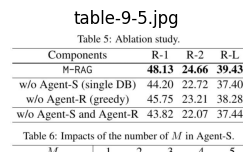

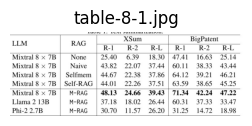

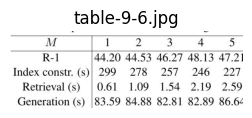

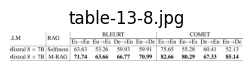

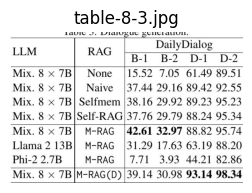

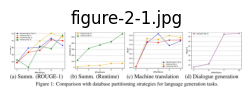

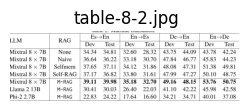

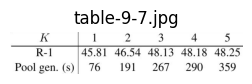

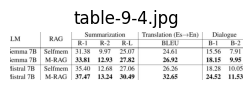

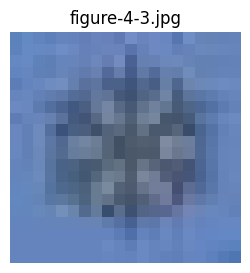

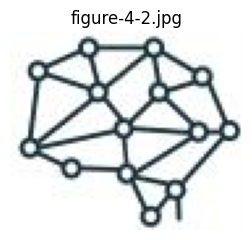

In [ ]:
# prompt: how do I view these figures

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

# Directory containing the extracted images
image_dir = "extracted_data"

# Iterate through the extracted images in the directory
for filename in os.listdir(image_dir):
    if filename.endswith((".png", ".jpg", ".jpeg")):  # Add more image extensions if needed
        image_path = os.path.join(image_dir, filename)
        img = mpimg.imread(image_path)
        # Create a new figure for each image
        plt.figure(figsize=(3, 3))
        #space
        plt.subplots_adjust(wspace=0.5, hspace=0.5)
        plt.imshow(img)
        plt.title(filename)  # Set title for the image
        plt.axis('off')  # Hide axis
        plt.show()


In [ ]:
img=[]
for element in raw_pdf_elements:
  if "unstructured.documents.elements.Image" in str(type(element)):
            img.append(str(element))

In [ ]:
tab=[]
for element in raw_pdf_elements:
  if "unstructured.documents.elements.Table" in str(type(element)):
            tab.append(str(element))

In [ ]:
Header=[]
Footer=[]
Title=[]
NarrativeText=[]
Text=[]
ListItem=[]


for element in raw_pdf_elements:
  if "unstructured.documents.elements.Header" in str(type(element)):
            Header.append(str(element))
  elif "unstructured.documents.elements.Footer" in str(type(element)):
            Footer.append(str(element))
  elif "unstructured.documents.elements.Title" in str(type(element)):
            Title.append(str(element))
  elif "unstructured.documents.elements.NarrativeText" in str(type(element)):
            NarrativeText.append(str(element))
  elif "unstructured.documents.elements.Text" in str(type(element)):
            Text.append(str(element))
  elif "unstructured.documents.elements.ListItem" in str(type(element)):
            ListItem.append(str(element))

In [ ]:
Title

['M-RAG: Reinforcing Large Language Model Performance through Retrieval-Augmented Generation with Multiple Partitions',
 'Abstract',
 '1 Introduction',
 '1966',
 '2 Related Work',
 'setting.',
 '3 Methodology',
 '(18) Reward',
 'Action',
 'cee 1',
 '‘Summary|',
 '3.1 Discussion on Partitioning a Database',
 '3.2 Agent-S: Selecting a Database Partition',
 '3.3. Agent-R: Refining Memories in the Selected Partition',
 'qd)',
 'Algorithm 1: The M-RAG Framework',
 'y)',
 '3.4 The M-RAG Framework',
 '4 Experiments',
 '4.1 Experimental Setup',
 '4.2 Experimental Results',
 'Table 3: Dialogue',
 '5 Conclusion and Limitations',
 'study (Agent-R state space i).',
 'References',
 'A Appendix',
 'A.1 Other Evaluation Metrics for Machine Translation',
 'A.2 Further Discussion',
 'Q1. Why applying RAG for summarization or translation?',
 'Q3. What is the motivation of the Agent-R and the revision of the retrieved memory?']

### Retrieval Process ends here, Now we going to get summary

In [ ]:
!pip install langchain_openai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.3/55.3 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 19.4 MB/s eta 0:00:00


In [ ]:
!pip install langchain_core

In [ ]:
len(tab)

8

In [ ]:
tab[0]

'Table 1: Text summarization. XSum BigPatent LLM RAG R-1 R-2. RL | R-1 R-2. RL Mixtral 8 x 7B None 25.40 6.39 18.30) 47.41 16.63 25.14 Mixtral 8 x 7B Naive 43.82 22.07 37.44 | 60.11 38.33 43.44 Mixtral 8 x 7B | Selfmem | 44.67 22.38 37.86 | 64.12 39.21 46.21 Mixtral 8 x 7B | Self-RAG | 44.01 22.26 37.51 | 63.59 38.65 45.25 Mixtral 8 x 7B M-RAG | 48.13 24.66 39.43 | 71.34 42.24 47.22 Llama 2 13B M-RAG 37.18 18.02 26.44 | 60.31 37.33 33.47 Phi-2 2.7B M-RAG 30.70 11.57 26.20 | 31.25 14.72 18.98'

In [ ]:
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate
from langchain_openai import ChatOpenAI

In [ ]:
prompt_text = """You are an assistant tasked with summarizing tables for retrieval. \
    These summaries will be embedded and used to retrieve the raw table elements. \
    Give a concise summary of the table that is well optimized for retrieval. Table {element} """

In [ ]:
prompt = ChatPromptTemplate.from_template(prompt_text)

In [ ]:
import os
from google.colab import userdata
OPENAI_API_TOKEN=userdata.get('OPENAI_APIS')
os.environ["OPENAI_APIS"] = OPENAI_API_TOKEN

In [ ]:
# Text summary chain
model = ChatOpenAI(temperature=0, model="gpt-3.5-turbo")

In [ ]:
summarize_chain = {"element": lambda x: x} | prompt | model | StrOutputParser()

In [ ]:
table_summaries = []
table_summaries=summarize_chain.batch(tab,{"max_concurrency": 5})

RateLimitError: Error code: 429 - {'error': {'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, read the docs: https://platform.openai.com/docs/guides/error-codes/api-errors.', 'type': 'insufficient_quota', 'param': None, 'code': 'insufficient_quota'}}

In [ ]:
table_summaries[0]

IndexError: list index out of range

In [ ]:
img[0]

In [ ]:
import base64
import os
from langchain_core.messages import HumanMessage

In [ ]:
def encode_image(image_path):
    """Getting the base64 string"""
    with open(image_path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode("utf-8")

In [ ]:
def image_summarize(img_base64, prompt):
    """Make image summary"""


    chat = ChatOpenAI(model="gpt-4-vision-preview", max_tokens=1024)

    msg = chat.invoke(
        [
            HumanMessage(
                content=[
                    {"type": "text", "text": prompt},

                     {
                        "type": "image_url",
                        "image_url": {"url": f"data:image/jpeg;base64,{img_base64}"},
                    },
                ]
            )
        ]
    )
    return msg.content

In [ ]:
def generate_img_summaries(path):
    """
    Generate summaries and base64 encoded strings for images
    path: Path to list of .jpg files extracted by Unstructured
    """

    # Store base64 encoded images
    img_base64_list = []

    # Store image summaries
    image_summaries = []

    # Prompt
    prompt = """You are an assistant tasked with summarizing images for retrieval. \
    These summaries will be embedded and used to retrieve the raw image. \
    Give a concise summary of the image that is well optimized for retrieval."""


    base64_image = encode_image(path)
    img_base64_list.append(base64_image)
    image_summaries.append(image_summarize(base64_image, prompt))

    return img_base64_list, image_summaries

In [ ]:
fpath="/content/extracted_data2/figure-17-4.jpg"

In [ ]:
img_base64_list,image_summaries=generate_img_summaries(fpath)

In [ ]:
image_summaries[0]

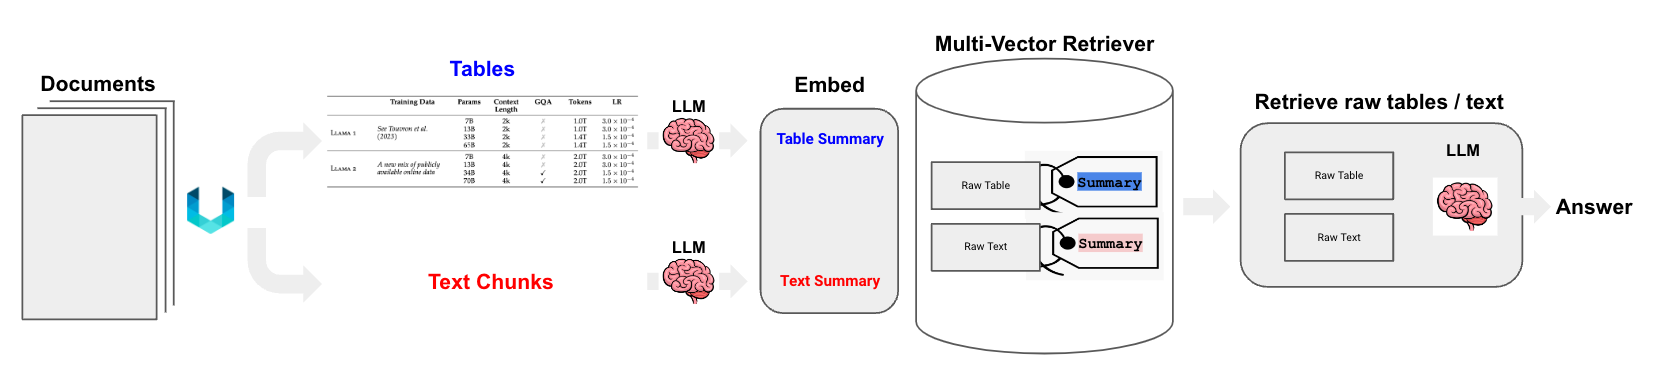

## Creating a Multi-Vector Retriever

In [ ]:
import uuid

from langchain.retrievers.multi_vector import MultiVectorRetriever
from langchain.storage import InMemoryStore
from langchain_community.vectorstores import Chroma  # Database for storing vectors
from langchain_core.documents import Document
from langchain_openai import OpenAIEmbeddings

In [ ]:
def create_multi_vector_retriever(vectorstore, text_summaries, texts, table_summaries, tables, image_summaries, images):
    """
    Create retriever that indexes summaries, but returns raw images or texts
    """

    # Initialize the storage layer
    store = InMemoryStore()
    id_key = "doc_id"

    # Create the multi-vector retriever
    retriever = MultiVectorRetriever(
        vectorstore=vectorstore,
        docstore=store,
        id_key=id_key,
    )


    # Helper function to add documents to the vectorstore and docstore
    def add_documents(retriever, doc_summaries, doc_contents):

      doc_ids = [str(uuid.uuid4()) for _ in doc_contents]

      summary_docs = [
              Document(page_content=s, metadata={id_key: doc_ids[i]})
              for i, s in enumerate(doc_summaries)
          ]

      retriever.vectorstore.add_documents(summary_docs)
      retriever.docstore.mset(list(zip(doc_ids, doc_contents)))

      # Add texts, tables, and images
      # Check that text_summaries is not empty before adding
      if text_summaries:
          add_documents(retriever, text_summaries, texts)
      # Check that table_summaries is not empty before adding
      if table_summaries:
          add_documents(retriever, table_summaries, tab)
      # Check that image_summaries is not empty before adding
      if image_summaries:
          add_documents(retriever, image_summaries, img)

    return retriever

vectorstore = Chroma(
    collection_name="mm_rag", embedding_function=OpenAIEmbeddings()
)

# Create retriever
retriever_multi_vector_img = create_multi_vector_retriever(
    vectorstore,
    text_summaries,
    Text,
    table_summaries,
    Table,
    image_summaries,
    img_base64_list,
)

In [ ]:
retriever_multi_vector_img

In [ ]:
import io
import re

from IPython.display import HTML, display
from PIL import Image

In [ ]:
def plt_img_base64(img_base64):
    """Disply base64 encoded string as image"""
    # Create an HTML img tag with the base64 string as the source
    image_html = f''
    # Display the image by rendering the HTML
    display(HTML(image_html))

In [ ]:
plt_img_base64(img_base64_list[1])

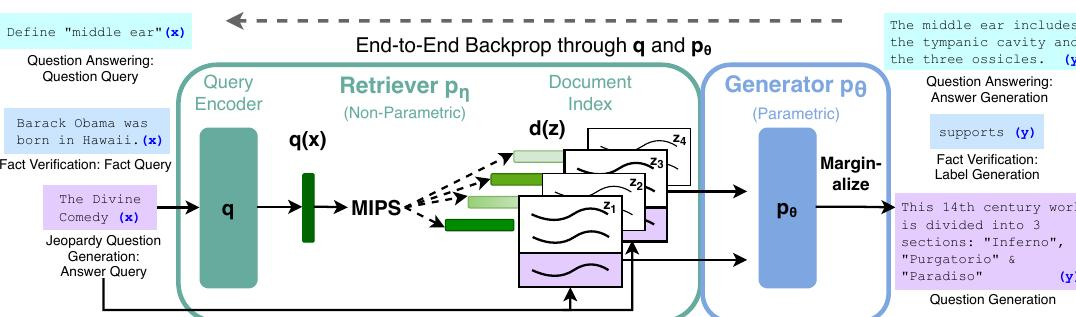

In [ ]:
image_summaries[1]

"The image is a schematic representation of an information retrieval system that uses natural language processing. It shows a pipeline with three main components: a Query Encoder, a Retriever, and a Generator, along with a feedback loop for end-to-end backpropagation. There are example text inputs for different types of queries such as definition, fact verification, and question generation. The diagram also features a document index visualized as stacked layers, and various mathematical notations indicating the flow and transformation of data between the system's components."

In [ ]:

def looks_like_base64(sb):
    """Check if the string looks like base64"""
    return re.match("^[A-Za-z0-9+/]+[=]{0,2}$", sb) is not None


In [ ]:
def is_image_data(b64data):
    """
    Check if the base64 data is an image by looking at the start of the data
    """
    image_signatures = {
        b"\xFF\xD8\xFF": "jpg",
        b"\x89\x50\x4E\x47\x0D\x0A\x1A\x0A": "png",
        b"\x47\x49\x46\x38": "gif",
        b"\x52\x49\x46\x46": "webp",
    }
    try:
        header = base64.b64decode(b64data)[:8]  # Decode and get the first 8 bytes
        for sig, format in image_signatures.items():
            if header.startswith(sig):
                return True
        return False
    except Exception:
        return False

In [ ]:
def resize_base64_image(base64_string, size=(128, 128)):
    """
    Resize an image encoded as a Base64 string
    """
    # Decode the Base64 string
    img_data = base64.b64decode(base64_string)
    img = Image.open(io.BytesIO(img_data))

    # Resize the image
    resized_img = img.resize(size, Image.LANCZOS)

    # Save the resized image to a bytes buffer
    buffered = io.BytesIO()
    resized_img.save(buffered, format=img.format)

    # Encode the resized image to Base64
    return base64.b64encode(buffered.getvalue()).decode("utf-8")

In [ ]:
def split_image_text_types(docs):
    """
    Split base64-encoded images and texts
    """
    b64_images = []
    texts = []

    for doc in docs:
        # Check if the document is of type Document and extract page_content if so
        if isinstance(doc, Document):
            doc = doc.page_content
        if looks_like_base64(doc) and is_image_data(doc):
            doc = resize_base64_image(doc, size=(1300, 600))
            b64_images.append(doc)
        else:
            texts.append(doc)

    return {"images": b64_images, "texts": texts}

In [ ]:
def img_prompt_func(data_dict):
    """
    Join the context into a single string
    """
    #print(data_dict)
    formatted_texts = "\n".join(data_dict["context"]["texts"])
    messages = []

    # Adding image(s) to the messages if present
    if data_dict["context"]["images"]:
        for image in data_dict["context"]["images"]:
            image_message = {
                "type": "image_url",
                "image_url": {"url": f"data:image/jpeg;base64,{image}"},
            }
            messages.append(image_message)

    # Adding the text for analysis
    text_message = {
        "type": "text",
        "text": (
            "You are a helpful assistant.\n"
            "You will be given a mixed info(s) .\n"
            "Use this information to provide relevant information to the user question. \n"
            f"User-provided question: {data_dict['question']}\n\n"
            "Text and / or tables:\n"
            f"{formatted_texts}"
        ),
    }
    messages.append(text_message)
    return [HumanMessage(content=messages)]

In [ ]:
from langchain_core.runnables import RunnableLambda, RunnablePassthrough

In [ ]:
def multi_modal_rag_chain(retriever):
    """
    Multi-modal RAG chain
    """

    # Multi-modal LLM
    model = ChatOpenAI(temperature=0, model="gpt-4-vision-preview", max_tokens=1024)


    # RAG pipeline
    chain = (
        {
            "context": retriever | RunnableLambda(split_image_text_types),
            "question": RunnablePassthrough(),
        }
        | RunnableLambda(img_prompt_func)
        | model
        | StrOutputParser()
    )

    return chain

In [ ]:
# Create RAG chain
chain_multimodal_rag = multi_modal_rag_chain(retriever_multi_vector_img)

In [ ]:
chain_multimodal_rag

## Check

In [ ]:
# Check retrieval
query = "Why We combine a pre-trained retriever (Query Encoder + Document Index) with a pre-trained seq2seq model (Generator) and fine-tune end-to-end?"
docs = retriever_multi_vector_img.invoke(query)

In [ ]:
docs

In [ ]:
query="Open-Domain QA Test Scores. For TQA,\
left column uses the standard test set for Open-\
Domain QA, right column uses the TQA-Wiki\
test set. See Appendix D for further details."

In [ ]:
docs = retriever_multi_vector_img.invoke(query)
docs

In [ ]:
query="Models are trained with either 5 or 10 retrieved latent\
documents, and we do not observe significant differences in performance between them."

In [ ]:
retriever_multi_vector_img.invoke(query)

In [ ]:
# We get back relevant images
plt_img_base64(docs)

# RAG

In [ ]:
query="can you explain me this Left: NQ performance as more documents are retrieved. Center: Retrieval recall performance\
in NQ. Right: MS-MARCO Bleu-1 and Rouge-L as more documents are retrieved."

In [ ]:
query1="Explain any images / figures in the paper with Left: NQ performance as more documents are retrieved. Center: Retrieval recall performance\
in NQ. Right: MS-MARCO Bleu-1 and Rouge-L as more documents are retrieved."

In [ ]:
# Run RAG chain
chain_multimodal_rag.invoke(query1)

'Unfortunately, there is no text or tables provided for me to explain the images or figures in the paper. However, based on the user-provided question, it seems that the paper includes three figures:\n\n1. Left: A graph showing the performance of a model (NQ) as more documents are retrieved. This could indicate how well the model is able to find relevant information as it processes more data.\n\n2. Center: A graph showing the retrieval recall performance in NQ. This could indicate how often the model is able to retrieve relevant documents from a set of search results.\n\n3. Right: A graph showing the MS-MARCO Bleu-1 and Rouge-L scores as more documents are retrieved. These are metrics used to evaluate the quality of machine-generated text, with Bleu-1 measuring the accuracy of individual words and Rouge-L measuring the quality of entire sentences.\n\nWithout the actual figures, it is difficult to provide a more detailed explanation. However, these descriptions should give you a general idea of what the figures represent.'